### Hyper minmaxscaler

In [2]:
import talib as ta

from datetime import datetime
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

def get_score(model, x_train=0, x_test=0):
    if not x_train or not x_test:
        x_train = X_train
        x_test = X_test
    y_pred = model.predict(x_test)
    print('train: {}'.format(model.score(x_train, y_train) * 100))
    print('test: {}'.format(model.score(x_test, y_test) * 100))
    print('accuracy score: {}'.format(accuracy_score(y_test, y_pred) * 100))

def return_plot(estimator, plot=False):
    split=0
    df['Predicted_Signal'] = estimator.predict(X)
    Cumulative_returns = np.cumsum(df[split:]['Returns'])
    df['Startegy_returns'] = df['Returns']* df['Predicted_Signal'].shift(1)
    Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
    print('Return: {}%'.format(Cumulative_Strategy_returns[-1]))
    
    if plot:
        plt.figure(figsize=(10,5))
        plt.plot(Cumulative_returns, color='r',label = 'Returns')
        plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
        plt.legend()
        plt.show()

best_params = {'C': 3792.690190732246,
 'class_weight': None,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'lbfgs',
 'tol': 1e-05}

In [3]:
df = pd.read_csv('data/data3_H1.csv', parse_dates=['Datetime'], index_col='Datetime')

In [4]:
X = df.drop('Target', axis=1).values
y = df.Target.values

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.40, random_state=42)

half_split = int(len(X_tmp) / 2)
X_test = X_tmp[:half_split]
X_final = X_tmp[half_split:]
y_test = y_tmp[:half_split]
y_final = y_tmp[half_split:]

In [5]:
minMaxScaler = MinMaxScaler()
X_train = minMaxScaler.fit_transform(X_train)
X_test = minMaxScaler.transform(X_test)
X_final = minMaxScaler.transform(X_final)

In [6]:
log = LogisticRegression(**best_params)
log.fit(X_train, y_train)

/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=1e-05, verbose=0, warm_start=False)

In [7]:
get_score(log)

train: 52.94371026378815
test: 52.199307386158054
accuracy score: 52.199307386158054


Return: 0.18446350775400203%


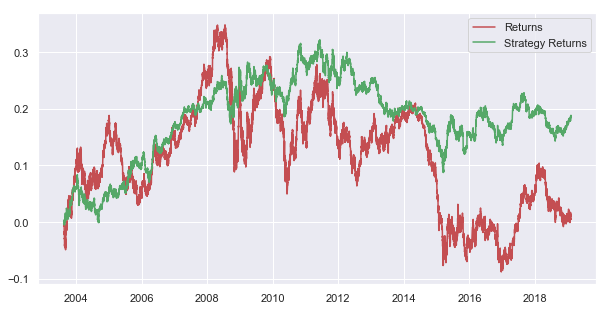

In [8]:
return_plot(log, plot=True)